In [1]:
# matplotlib is the basic plotting (graphical) library, it is very old and poverfull, but 
# also too complicated sometimes.
%matplotlib inline 
### this is jupyter "magic" command that lets matplotlib to add plots (graphics) to the notebook
### if you want, try `%matplotlib notebook` instead, it will add some interactivity to the plot

In [2]:
import pylab as plt
### actually pylab is also part of the matplotlib, but this time we import it as an object to work with.

In [3]:
import pandas as pd

In [4]:
# download any file from here
# https://s3.amazonaws.com/tripdata/index.html
# documentation of the dataset is here: https://www.citibikenyc.com/system-data


# this might take a while, especially in the HSU
df = pd.read_csv('data/201607-citibike-tripdata.csv')    

In [5]:
## Data types
# by default, pandas tryes to infer all the data types automatically.
# one columns always contains one data type.
df.dtypes 


tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                 float64
gender                       int64
dtype: object

## Datetime

In [6]:
cols = ('starttime', 'stoptime')
df.loc[:2, cols]

,starttime,stoptime
0,7/1/2016 00:00:02,7/1/2016 00:11:47
1,7/1/2016 00:00:18,7/1/2016 00:08:31
2,7/1/2016 00:00:19,7/1/2016 00:03:31


In [7]:
# as you can see, it takes starttime and stoptime as text, not time. we need to parse it manually
for col in cols:
    df[col] = pd.to_datetime(df[col], format='%m/%d/%Y %H:%M:%S')
# in this case format is not necessery, as it is standart, but it is a good practice to provide one.
# all info on symbols for time parsing is here http://strftime.org/
# it will take some time...

In [8]:
# now, we can do a lot of fun with the datatime columns.
# for example:
df['starttime'].dt.year.head(3) # `.dt.` gives access to datetime functions
#also try
# df['starttime'].dt.month
# df['starttime'].dt.day
# df['starttime'].dt.workday # day of the week
# df['starttime'].dt.quarter # quarter of the year

0    2016
1    2016
2    2016
Name: starttime, dtype: int64

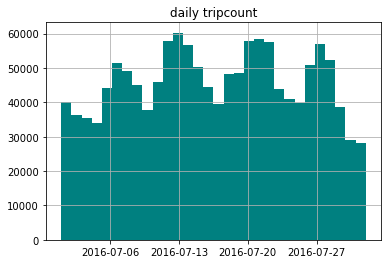

In [9]:
# also, datetime works similarly to numbers - you can add/substract, summ, etc.
# lets calculate starttime density
df['starttime'].hist(bins=30, color='teal') # it does not really help, but we can see some periodic patterns here
plt.title('daily tripcount') # also, dt is a little mess, as I just split the timerange by 30 (~days in month)

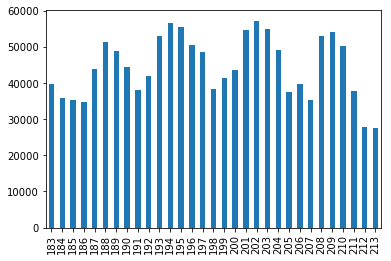

In [10]:
# here it is much better
# we will discuss Visualisation in next notebook
# column # day of the year # trips per day # sort by day # plot
df['starttime'].dt.dayofyear.value_counts().sort_index().plot(kind='bar') 

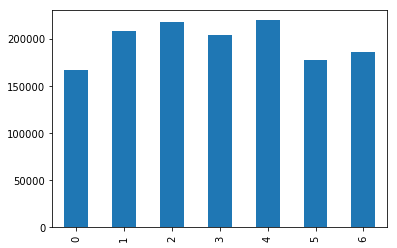

In [11]:
# same but day of the week
df['starttime'].dt.dayofweek.value_counts().sort_index().plot(kind='bar') 

In [12]:
## Now, can we do something else but the counts?

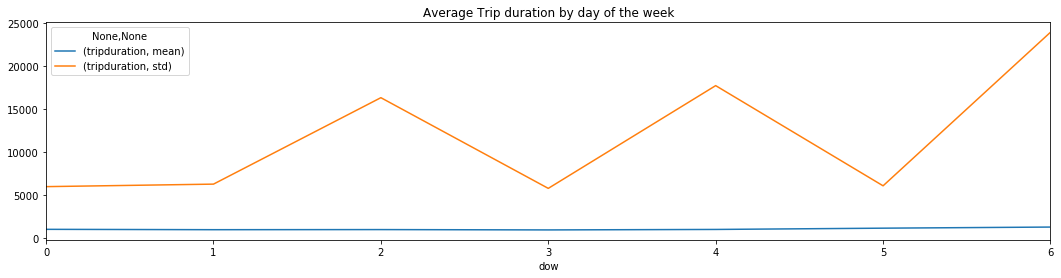

In [13]:
## by day of week
df['dow'] = df['starttime'].dt.dayofweek
df.groupby('dow').agg({'tripduration':['mean','std']}).plot(figsize=(18,4), title='Average Trip duration by day of the week')

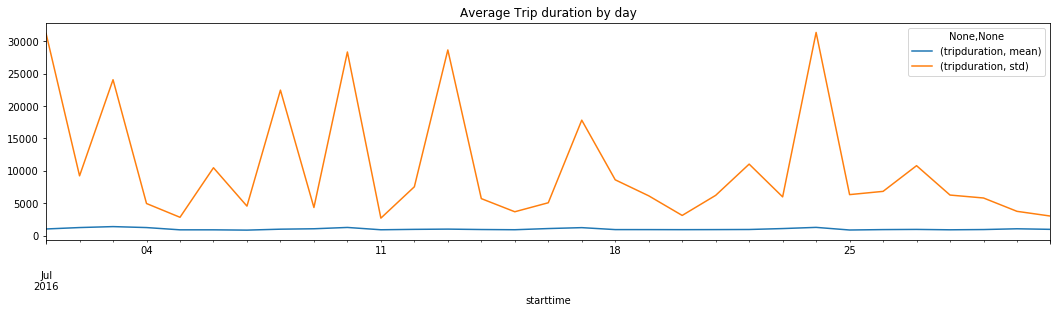

In [14]:
## here we set datetime index
## awesome thing about resample is that it adds missing timeranges in between
x = df.set_index('starttime').resample('1D').agg({'tripduration':['mean','std']})
x.plot(figsize=(18,4), title='Average Trip duration by day')

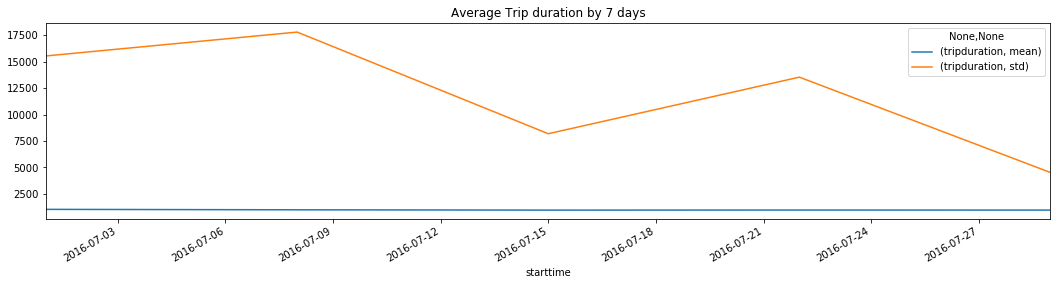

In [15]:
# it is also super-flexivle. here lets aggregate to each 7 days
x = df.set_index('starttime').resample('7D').agg({'tripduration':['mean','std']})
x.plot(figsize=(18,4), title='Average Trip duration by 7 days')

In [16]:
# note that medium tripduration is almost constant - it is just most of the people trys to stay within 30m free interval

In [17]:
#what abput hour of the day /week ?

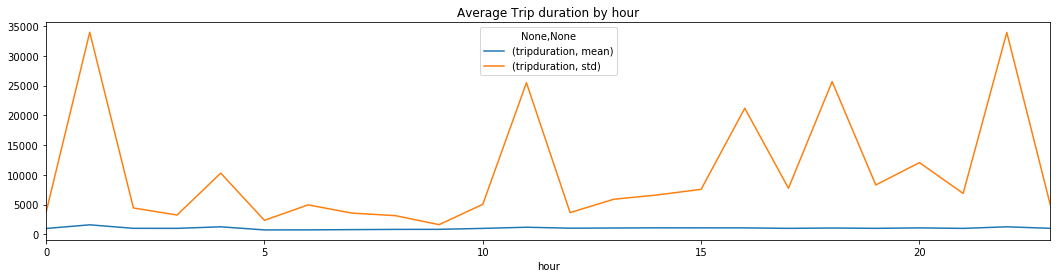

In [18]:
df['hour'] = df['starttime'].dt.hour
df.groupby('hour').agg({'tripduration':['mean','std']}).plot(figsize=(18,4), title='Average Trip duration by hour')

In [19]:
# now lets create "hour of the week" column
df['how'] = df['hour'] + df['dow']*24

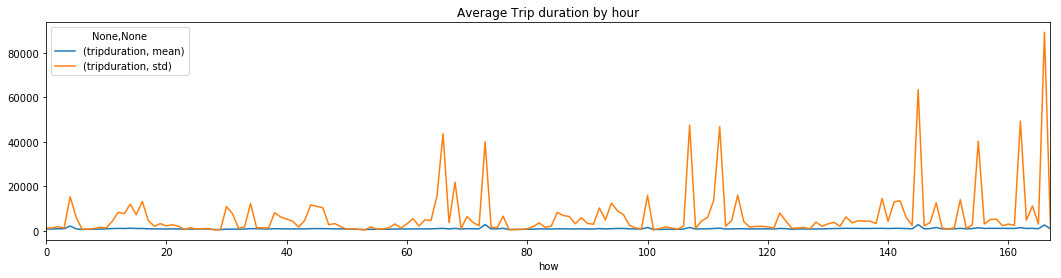

In [20]:
df.groupby('how').agg({'tripduration':['mean','std']}).plot(figsize=(18,4), title='Average Trip duration by hour')

## String

In [23]:
# String is another type of the oblect
df['start station name'].head()

0         W 20 St & 11 Ave
1    Lafayette St & E 8 St
2      N 8 St & Driggs Ave
3         W 20 St & 11 Ave
4    Greenwich Ave & 8 Ave
Name: start station name, dtype: object

In [24]:
df['start station name'].str.upper().head()

0         W 20 ST & 11 AVE
1    LAFAYETTE ST & E 8 ST
2      N 8 ST & DRIGGS AVE
3         W 20 ST & 11 AVE
4    GREENWICH AVE & 8 AVE
Name: start station name, dtype: object

In [25]:
df['start station name'].str.lower().head()

0         w 20 st & 11 ave
1    lafayette st & e 8 st
2      n 8 st & driggs ave
3         w 20 st & 11 ave
4    greenwich ave & 8 ave
Name: start station name, dtype: object

In [30]:
# lets get the last word in the address. 
# note that we have to use `str.` 2 times here - one time to get lower case
# and one time to split on 
df['start station name'].str.lower().str.split(' ').str.get(-1).value_counts().head(5)

st          638448
ave         521362
broadway     47391
pl           24135
s            20602
Name: start station name, dtype: int64

In [34]:
# strings that contain ...
df[df['start station name'].str.contains(' Ave') ].head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,dow,hour,how
0,704,2016-07-01 00:00:02,2016-07-01 00:11:47,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,17431,Customer,NaN,0,4,0,96
2,191,2016-07-01 00:00:19,2016-07-01 00:03:31,3090,N 8 St & Driggs Ave,40.717746,-73.956001,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,16345,Subscriber,1986.0,2,4,0,96
3,687,2016-07-01 00:00:24,2016-07-01 00:11:52,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,25210,Customer,NaN,0,4,0,96


## Regular expressions
Regular expressions is a separate technology that allows to process strings (match patterns, extract subparts, look for non-strict matches, etc) very fast. Regex